In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
import healpy as hp
import matplotlib.colors as mcolors
import seaborn as sns
sns.set()
sns.set_style("darkgrid", {'grid.linestyle': '--', 'font.serif':'Times New Roman'})
sns.set_context("poster", 1.5, {"lines.linewidth": 2.0})

def rpm2period(rpm):
    return 60.0 / rpm

def get_data(path):
    with h5py.File(path, 'r') as f:
        # argsグループからデータを取得
        args_group = f['args']
        spin_n = args_group['spin_n'][()]
        spin_m = args_group['spin_m'][()]
        lmax4likelihood = args_group['lmax4likelihood'][()]
        rho = args_group['rho'][()]
        chi = args_group['chi'][()]
        ss = {key: value[()] for key, value in args_group['ss'].items()}
        
        # quantifyグループからデータを取得
        quantify_group = f['quantify']
        n = quantify_group['n'][()]
        m = quantify_group['m'][()]
        mean = quantify_group['mean'][()]
        std = quantify_group['std'][()]
        hitmap_std = quantify_group['hitmap_std'][()]

        # delta_rのデータを取得
        delta_r = f['delta_r'][()]
        return {"ss":ss, "n":n, "m":m, "hitmap_std":hitmap_std, "mean":mean, "std":std, "delta_r":delta_r}

In [2]:
def get_dataset():
    alpha = [45.0, 47.5, 50.0]
    T_alpha = [1.0, 3.2058000000000004, 10.0, 100.0]
    path = "/group/cmb/litebird/usr/ytakase/scan_optimisation/systematics/lower_T_beta_space/output"
    dataset = [[],[],[]]
    for idx, i in enumerate(alpha):
        for j in T_alpha:
            file = "/230502_256_19Hz_1amin_alpha={}_T_alpha={}hrs".format(i, j)
            data = [get_data(path + file + "/output_{}.h5".format(k)) for k in range(1, 101)]
            dataset[idx].append(data)
            
    return dataset
dataset = get_dataset()

In [3]:
data = dataset[0][0]
T_spin = [rpm2period(data[i]['ss']['spin_rpm'])/60 for i in range(len(data))]
xlinks = np.zeros([len(data), len(data[0]["mean"])])
for i in range(len(data)):
    for j in range(len(data[0]["mean"])):
        xlinks[i,j] = data[i]["mean"][j]
        

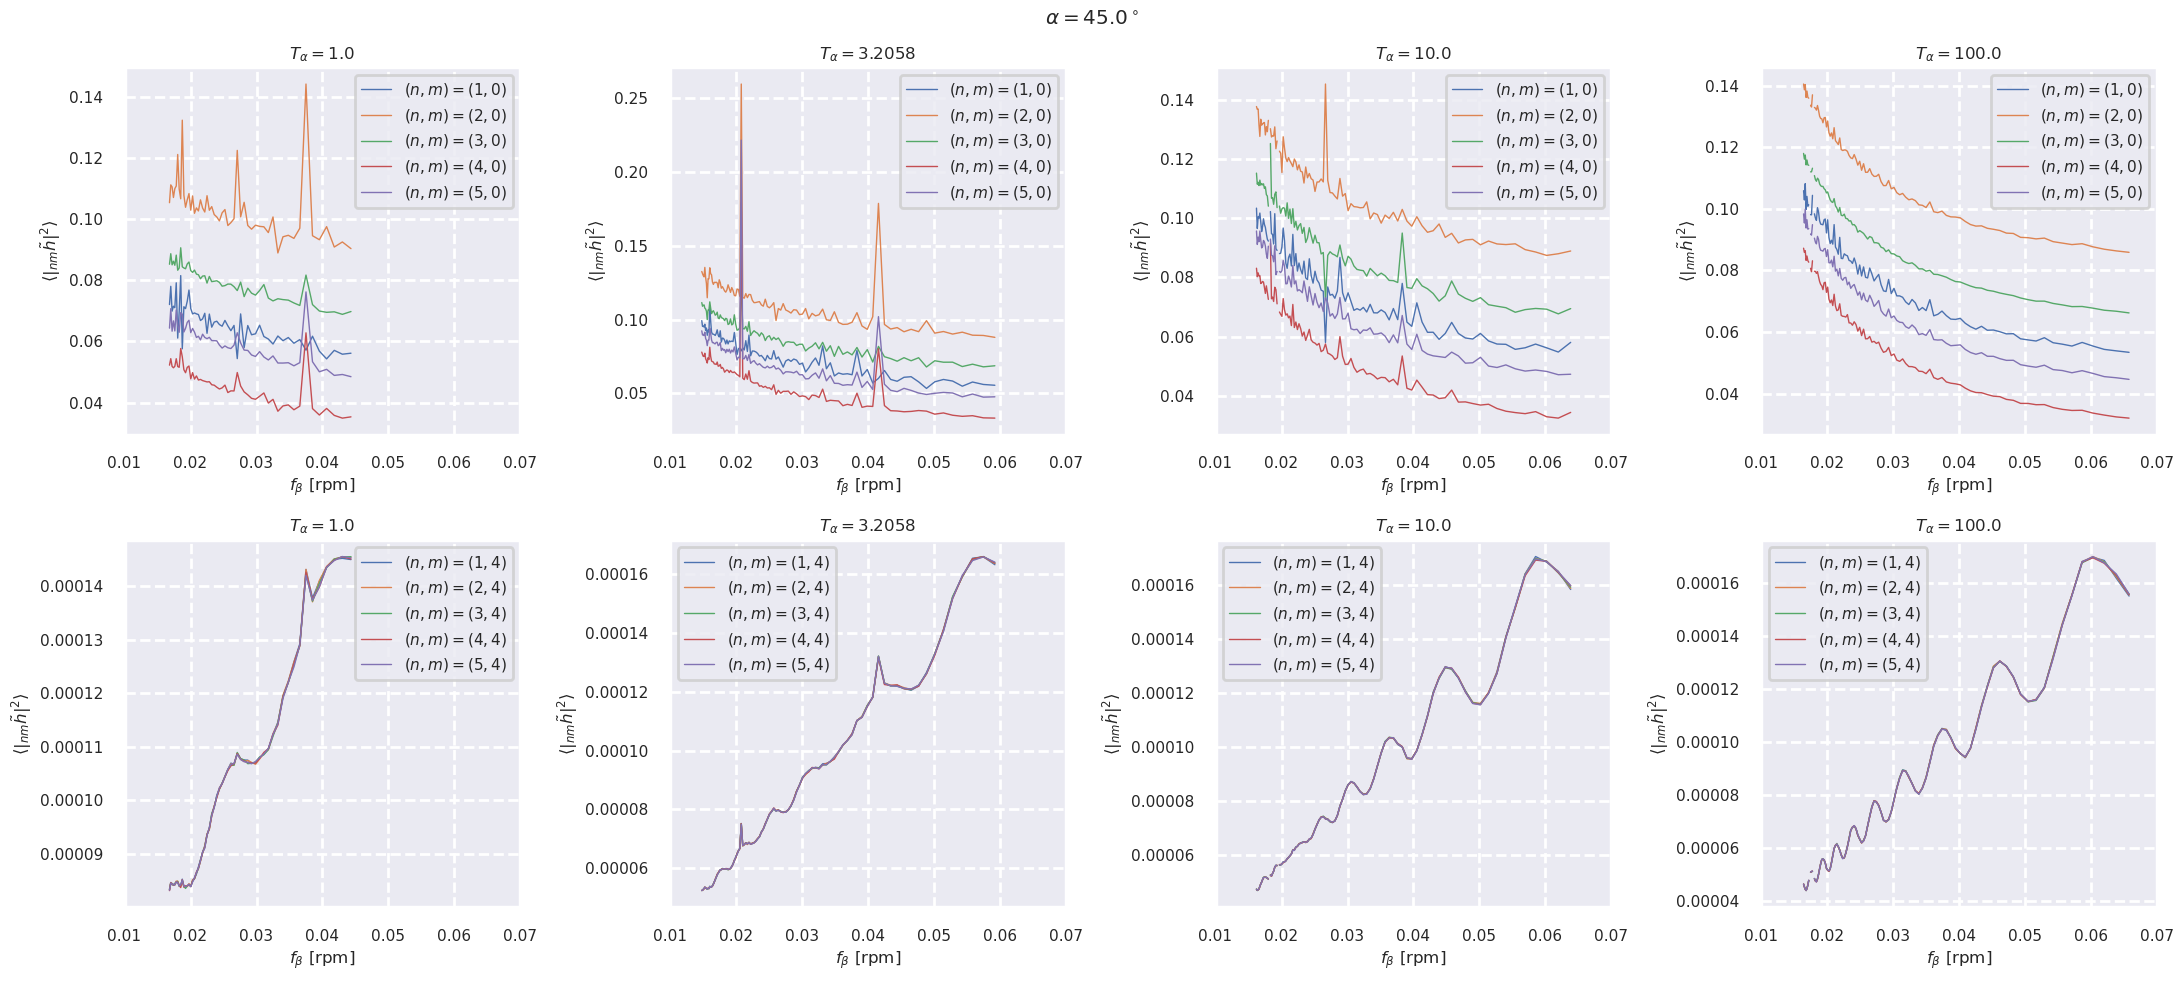

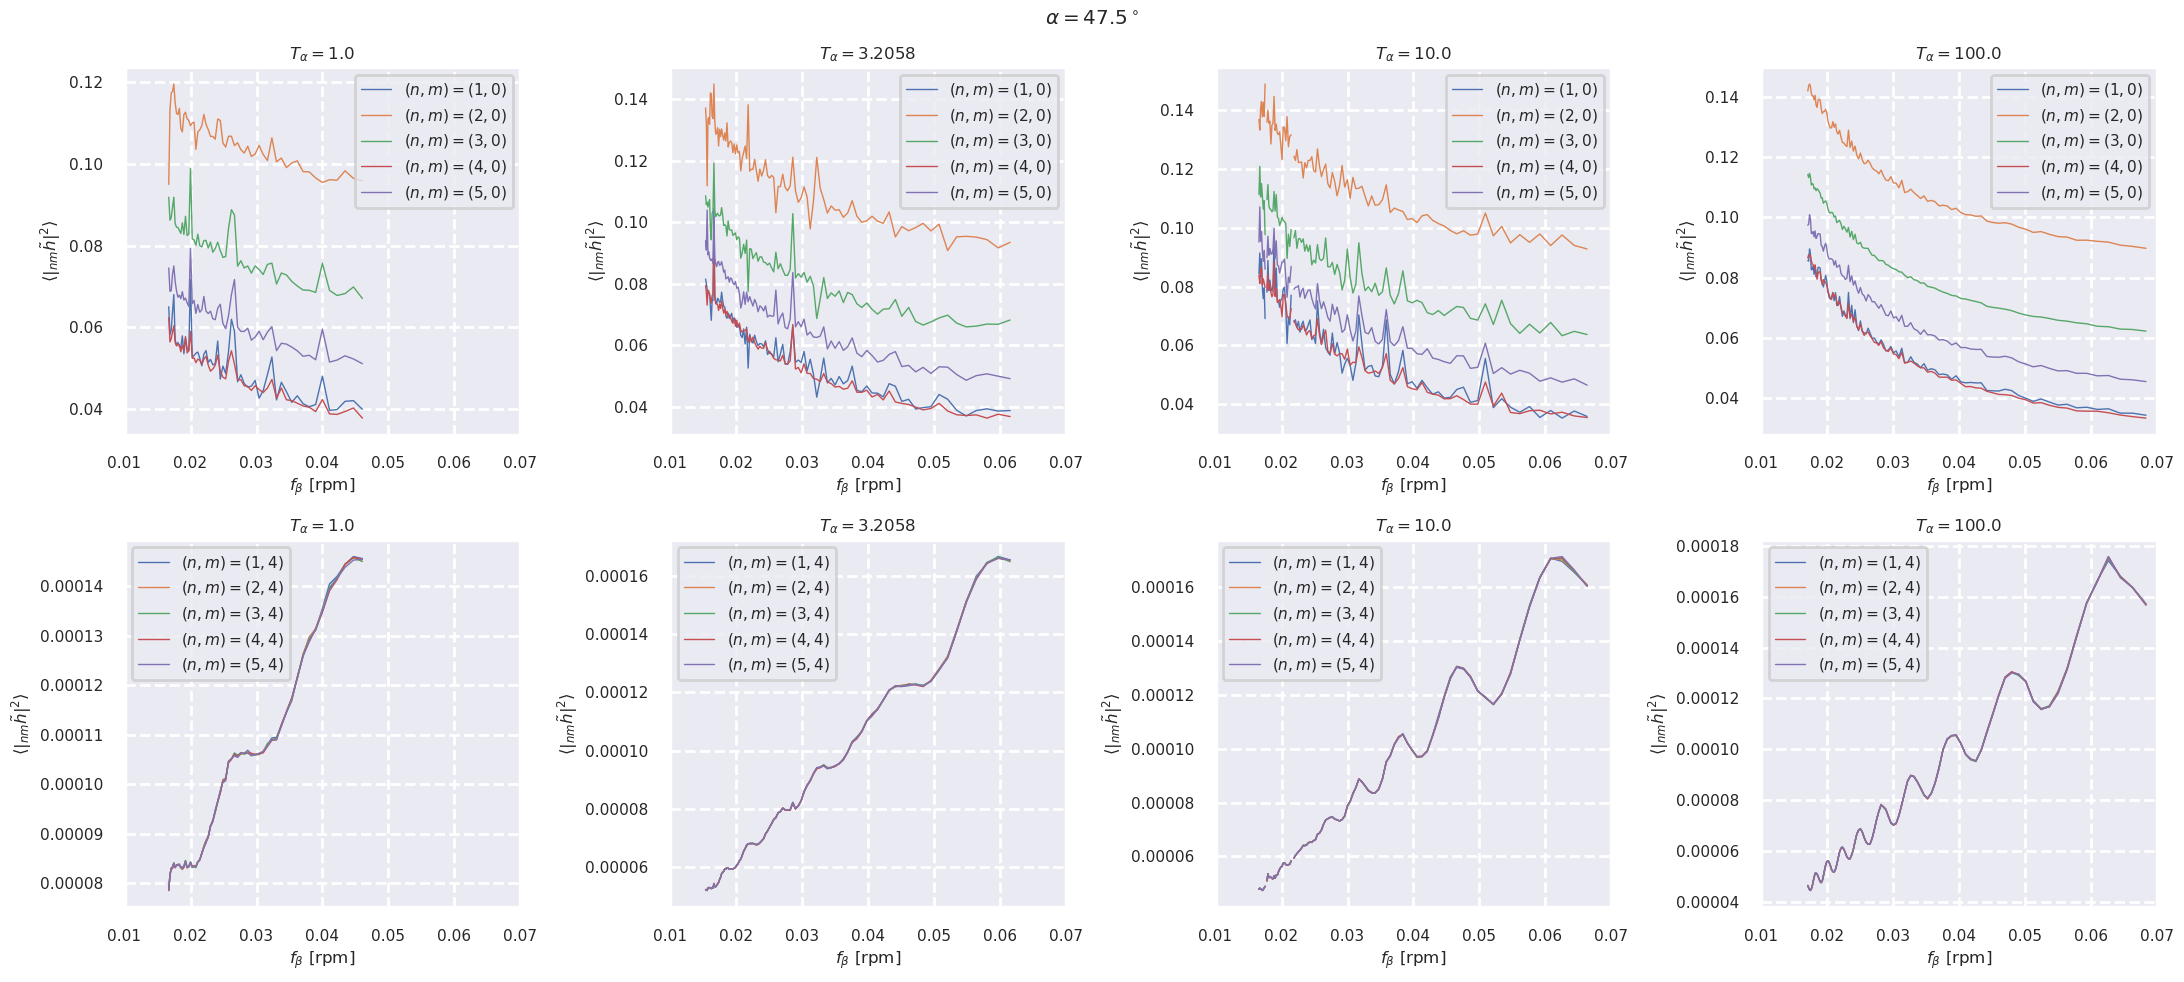

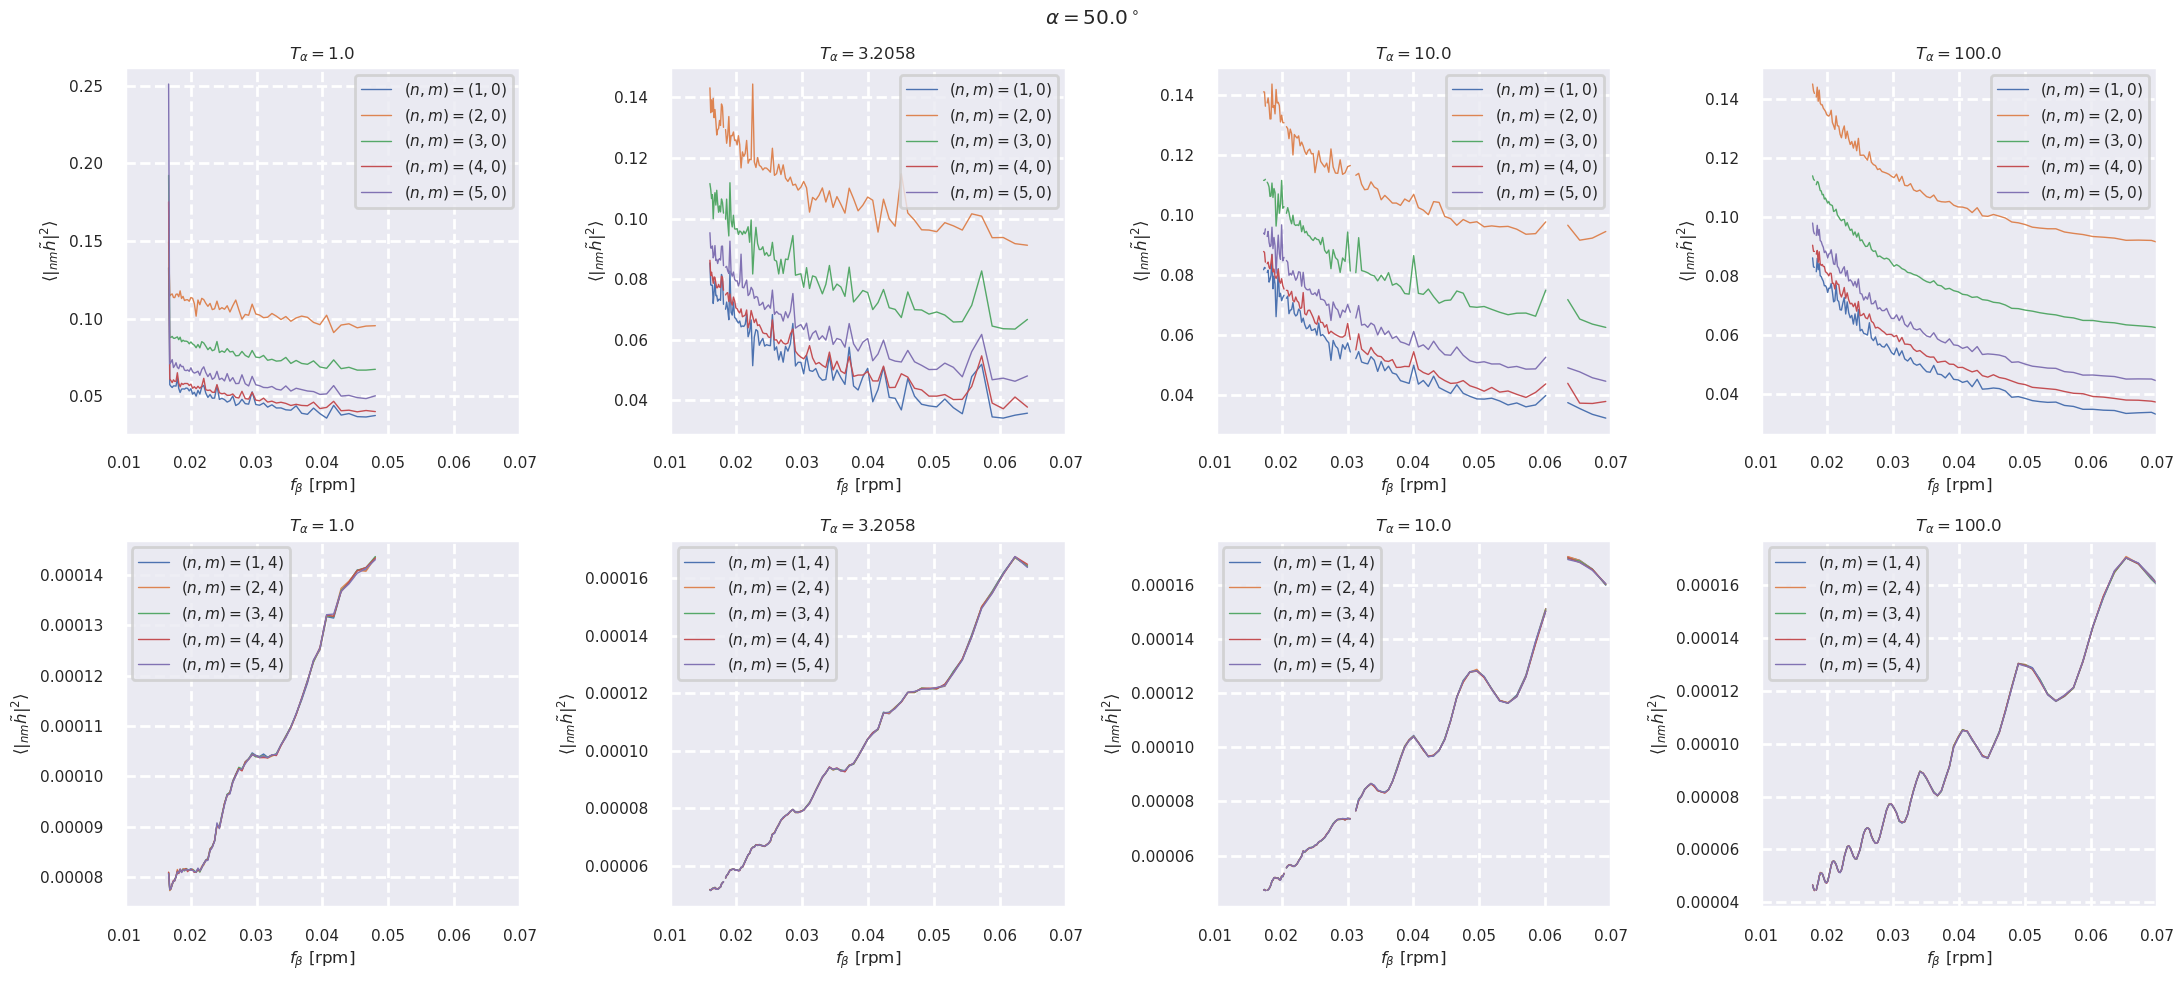

In [7]:
alpha = [45.0, 47.5, 50.0]
T_alpha = [1.0, 3.2058, 10.0, 100.0]
N = [1,2,3,4,5]
M = [0,4,8]
    
sns.set_context("poster", 0.5, {"lines.linewidth": 1.0})
for idx_al, al in enumerate(alpha):
    fig, axes = plt.subplots(2, 4, figsize=(22, 10))
    fig.suptitle(r"$\alpha={}^\circ$".format(al))
    for idx_T_al, T_al in enumerate(T_alpha):
        data = dataset[idx_al][idx_T_al]
        T_spin = [(data[i]['ss']['spin_rpm']) for i in range(len(data))]
        xlinks = np.zeros([len(data), len(data[0]["mean"])])
        for i in range(len(data)):
            for j in range(len(data[0]["mean"])):
                xlinks[i,j] = data[i]["mean"][j]
        for m in range(2):
            ax = axes[m, idx_T_al]
            ax.set_title(r"$T_\alpha={}$".format(T_al))
            bl = (data[0]["m"] == M[m]) * (data[0]["n"]>0)
            xl = np.array(xlinks[:,bl]).T
            for n in range(5):
                """
                if M[m] == 0:
                    ax.set_ylim(0, 0.15)
                if M[m] == 4:
                    ax.set_ylim(0, 2e-4)
                if M[m] == 8:
                    ax.set_ylim(0, 7e-5)
                """
                #ax.set_ylim(0,1)
                #a = xl[n][~np.isnan(xl[n])]
                #xl[n][xl[n]>xl[n][-1]] = np.nan
                #ax.plot(T_spin, xl[n]/np.nanmax(xl[n]), "-", markersize = 3, label="$(n,m)=({},{})$".format(N[n],M[m]))
                ax.plot(T_spin, xl[n], "-", label="$(n,m)=({},{})$".format(N[n],M[m]))
                ax.set_xlim(0.01,0.07)
                ax.set_xlabel(r"$f_{\beta}$ [rpm]")
                ax.set_ylabel(r"$\leftangle |_{nm}\tilde{h}|^2 \rightangle$")
            ax.legend()
        plt.tight_layout()

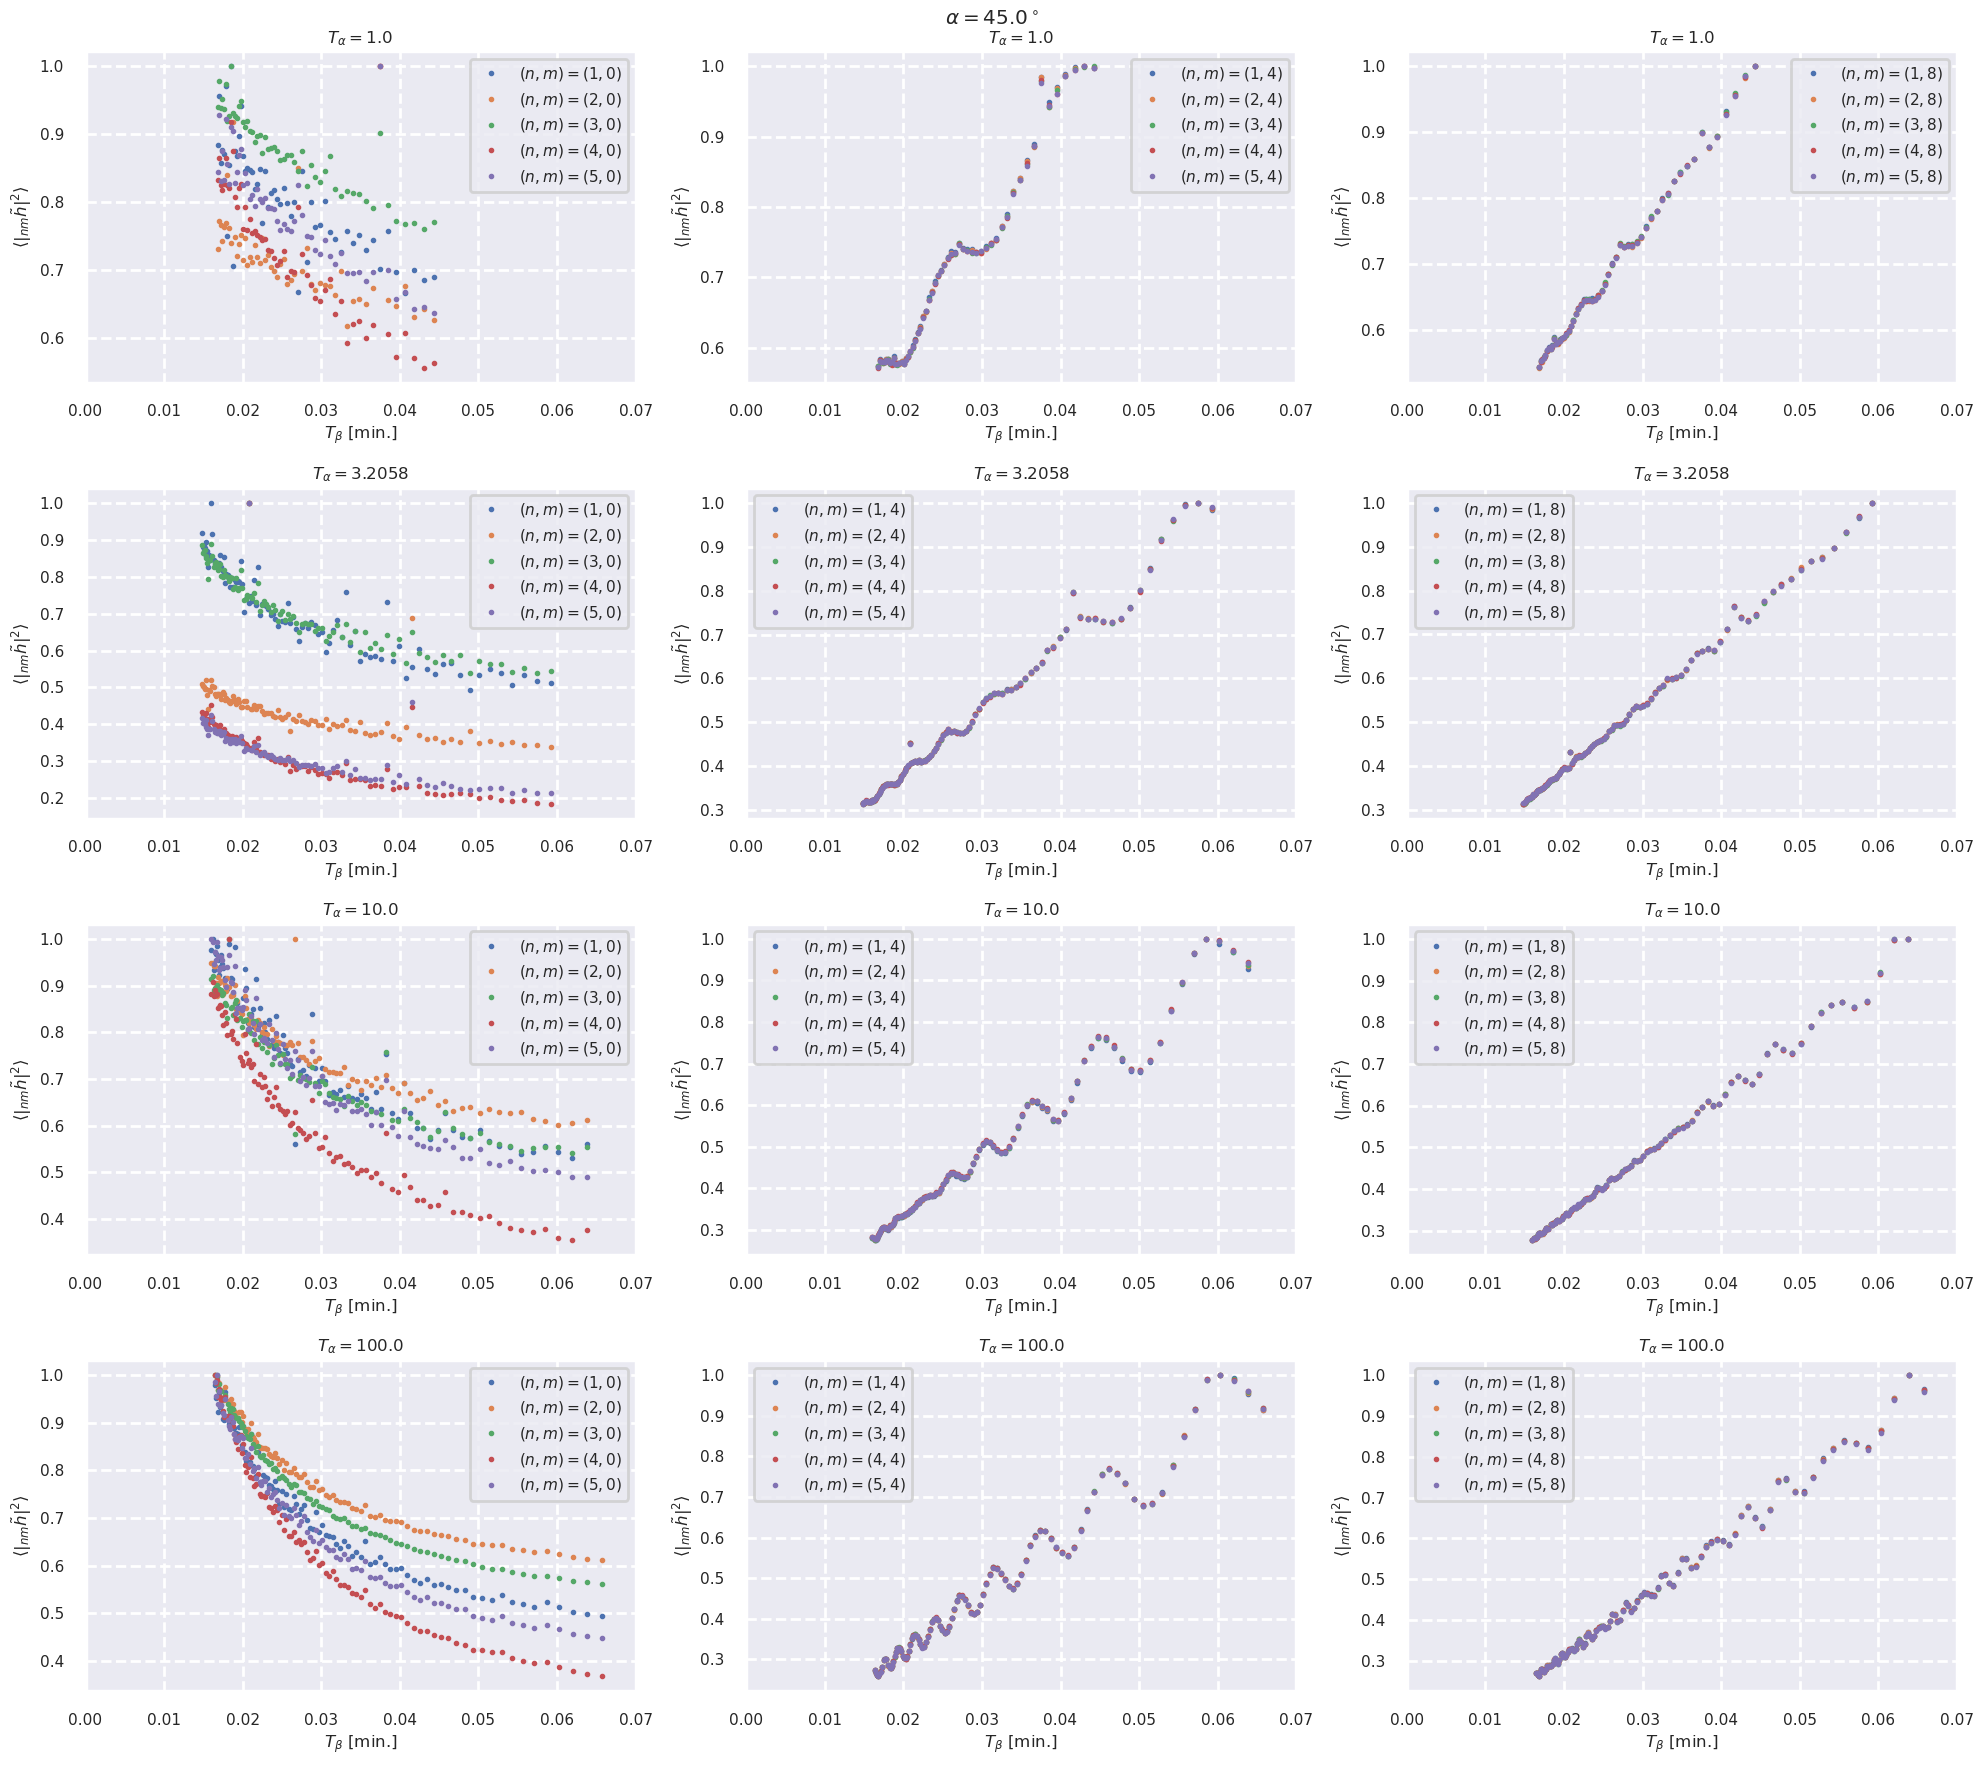

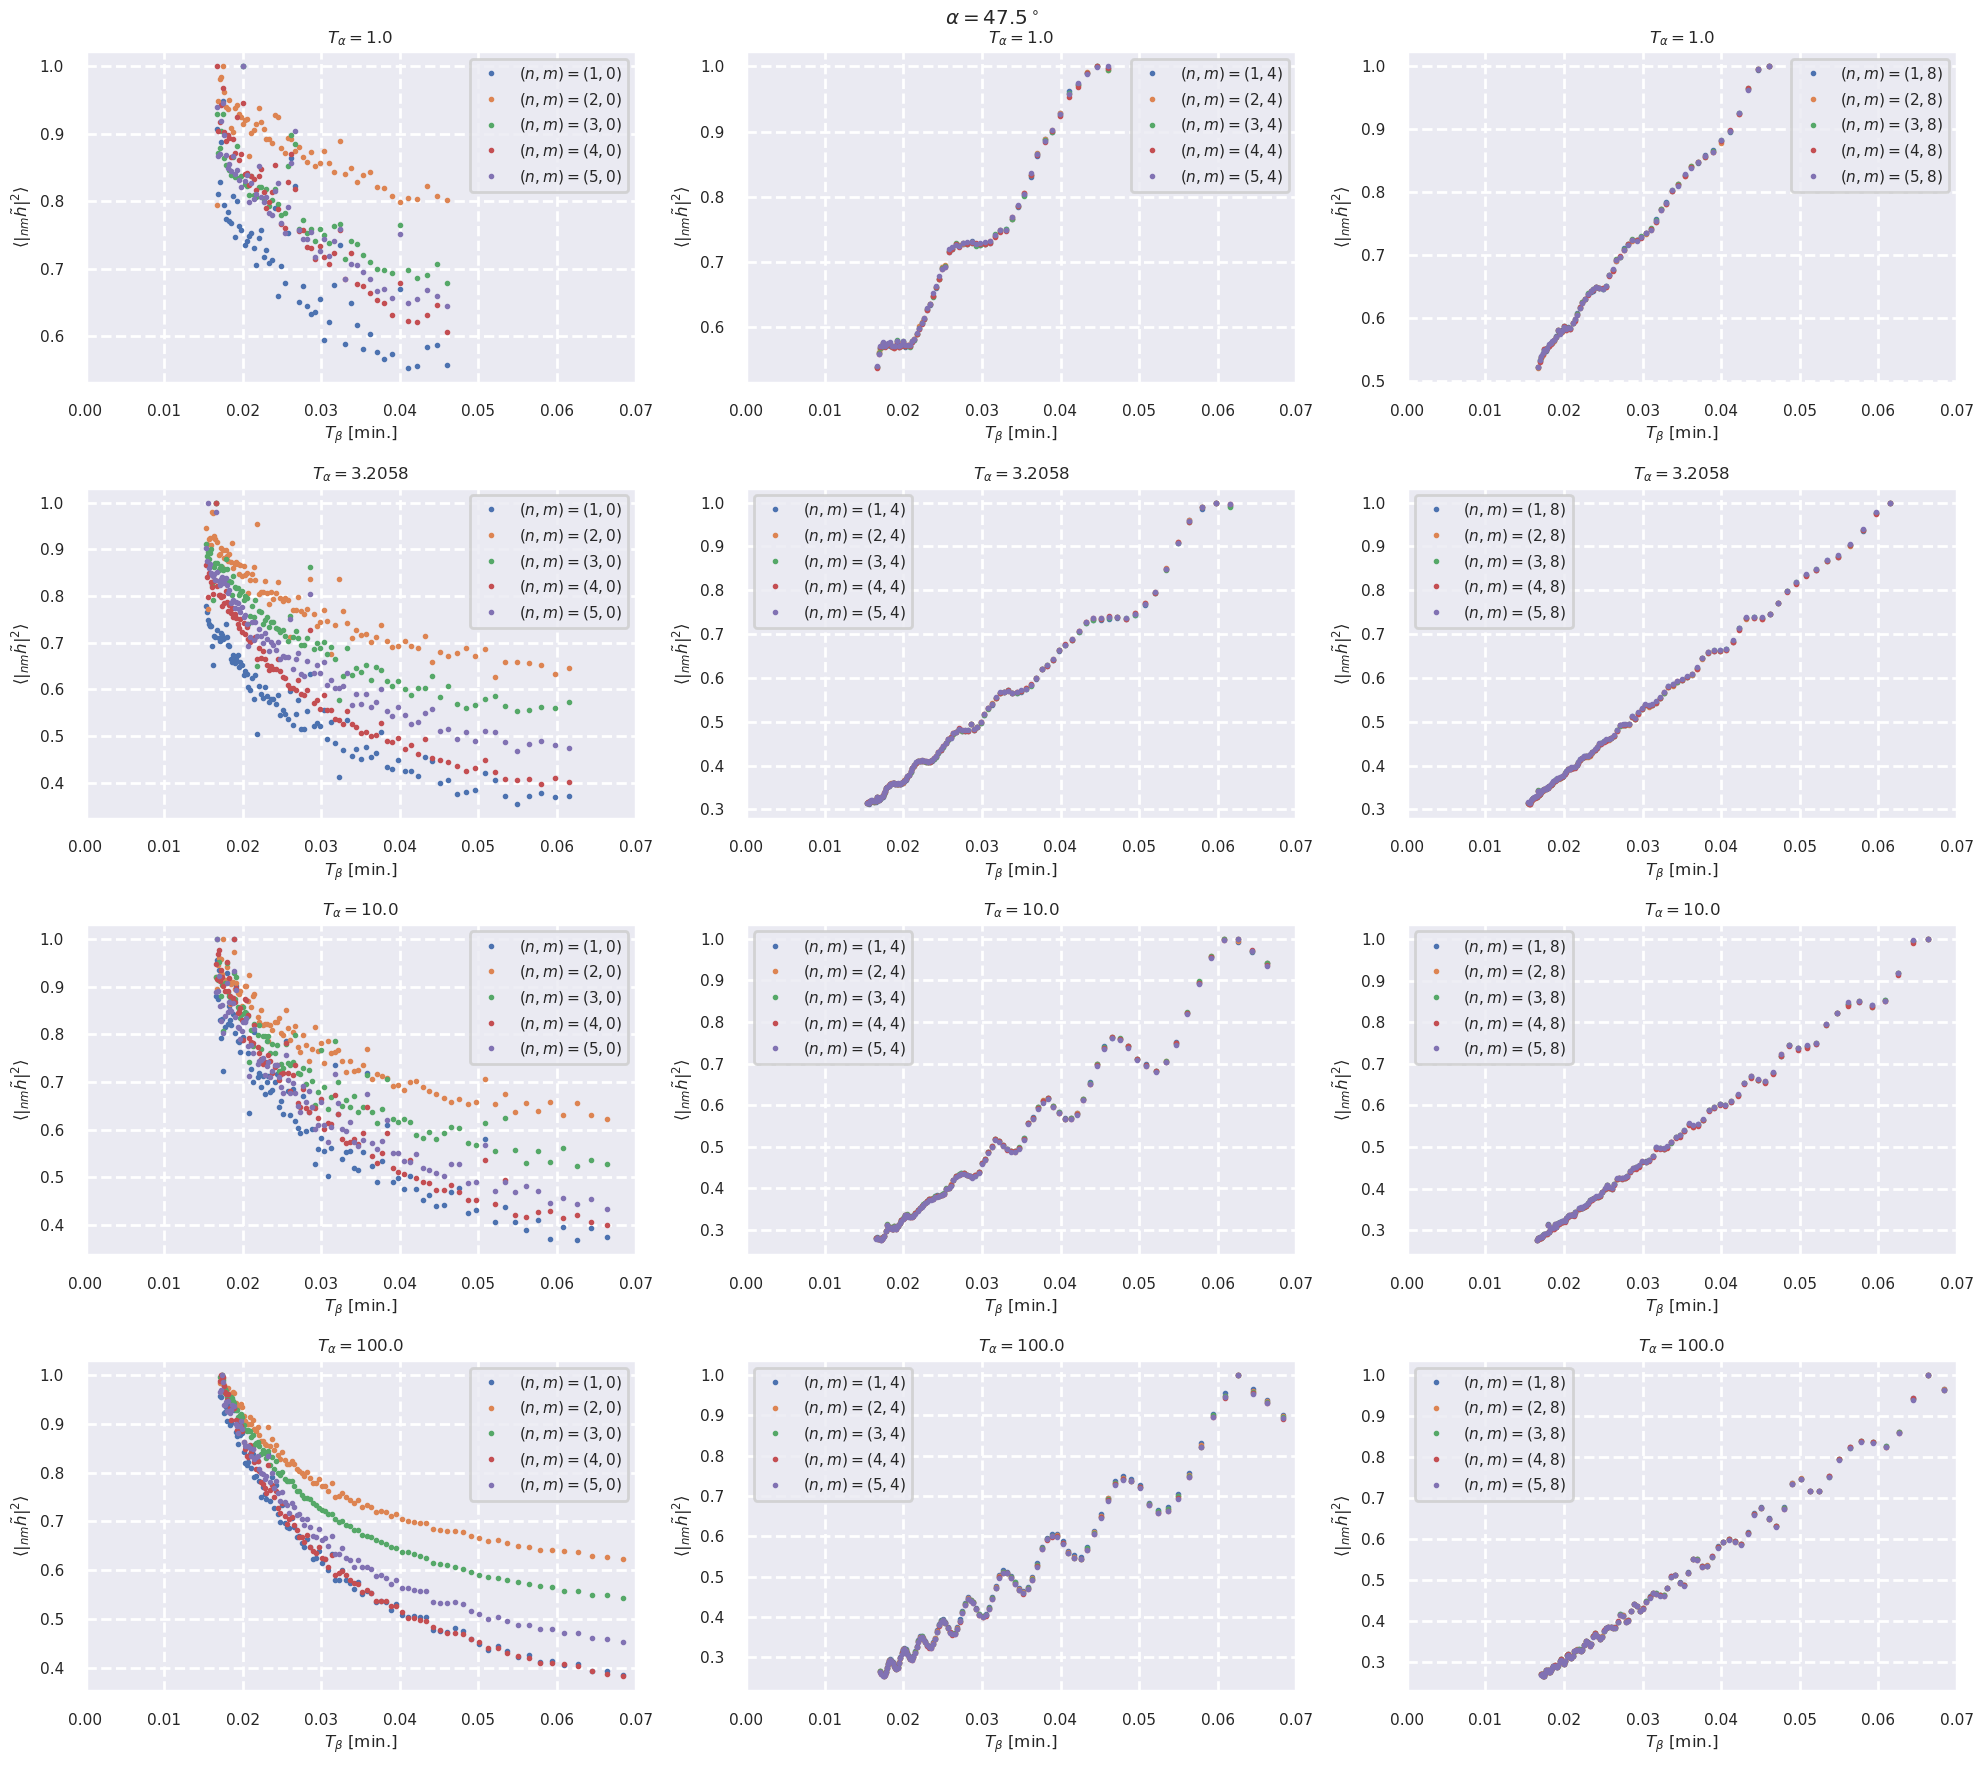

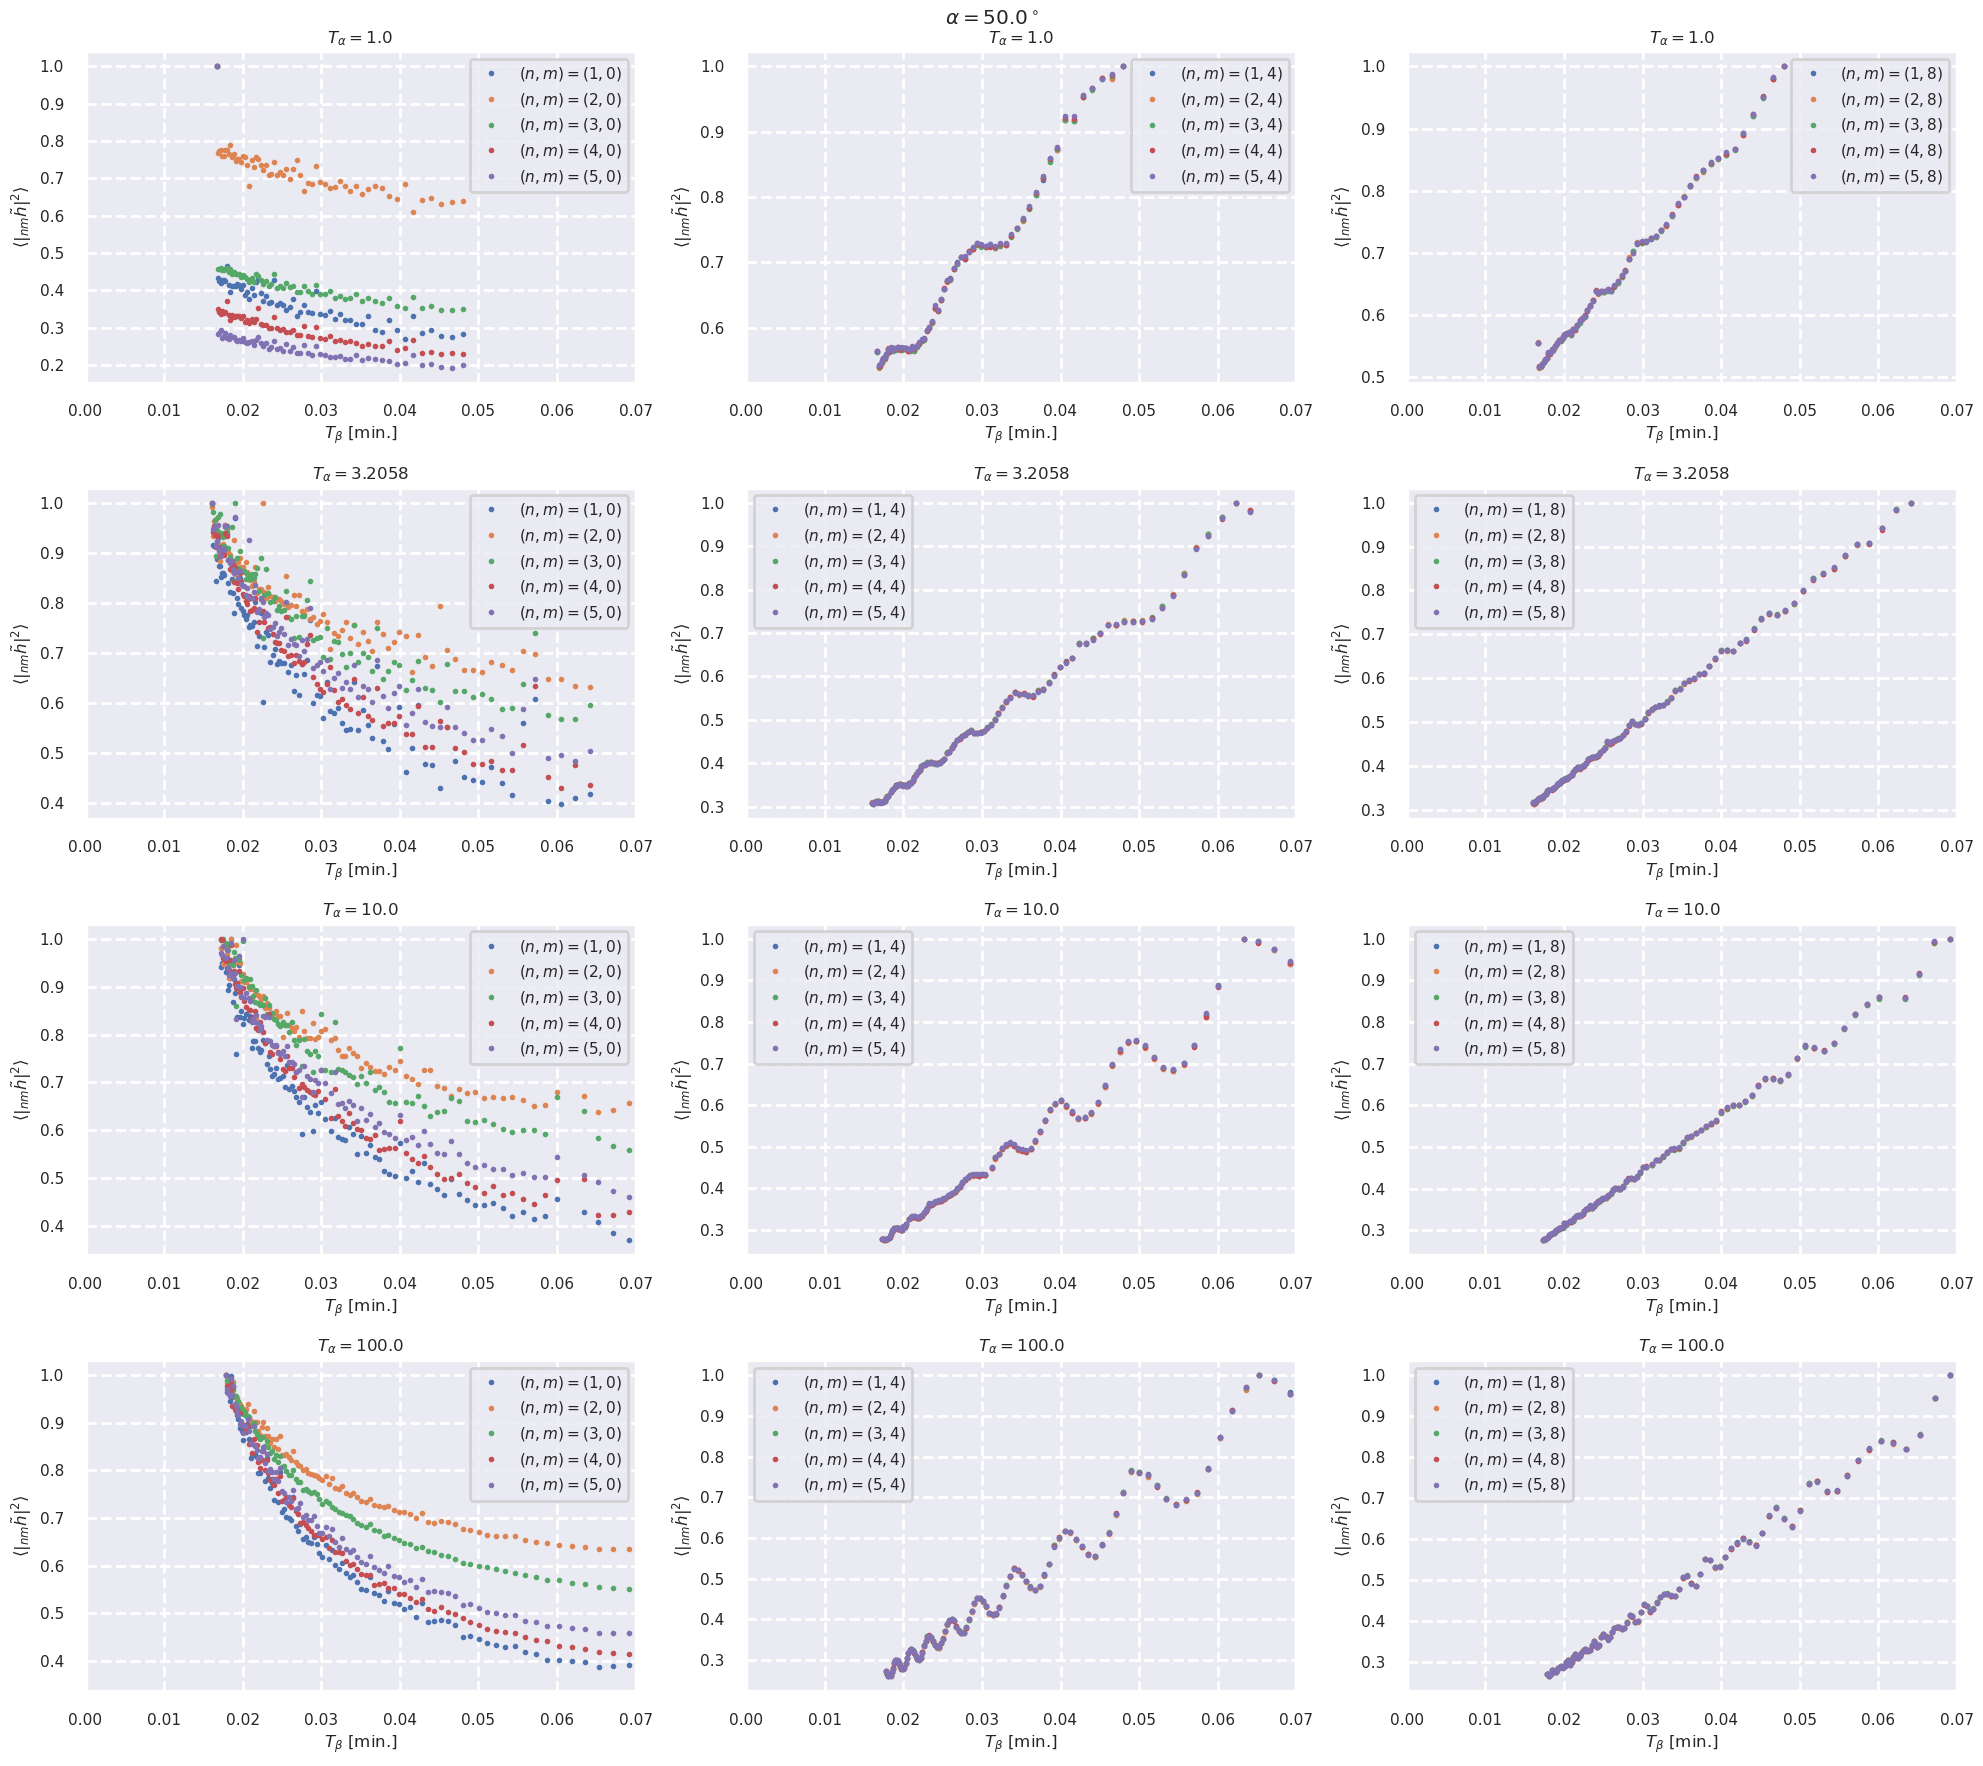

In [9]:
alpha = [45.0, 47.5, 50.0]
T_alpha = [1.0, 3.2058, 10.0, 100.0]
N = [1,2,3,4,5]
M = [0,4,8]
    
sns.set_context("poster", 0.5, {"lines.linewidth": 1.0})
for idx_al, al in enumerate(alpha):
    fig, axes = plt.subplots(4, 3, figsize=(20, 18))
    fig.suptitle(r"$\alpha={}^\circ$".format(al))
    for idx_T_al, T_al in enumerate(T_alpha):
        data = dataset[idx_al][idx_T_al]
        T_spin = [(data[i]['ss']['spin_rpm']) for i in range(len(data))]
        xlinks = np.zeros([len(data), len(data[0]["mean"])])
        for i in range(len(data)):
            for j in range(len(data[0]["mean"])):
                xlinks[i,j] = data[i]["mean"][j]
        for m in range(3):
            ax = axes[idx_T_al, m]
            ax.set_title(r"$T_\alpha={}$".format(T_al))
            bl = (data[0]["m"] == M[m]) * (data[0]["n"]>0)
            xl = np.array(xlinks[:,bl]).T
            for n in range(5):
                """
                if M[m] == 0:
                    ax.set_ylim(0, 0.15)
                if M[m] == 4:
                    ax.set_ylim(0, 2e-4)
                if M[m] == 8:
                    ax.set_ylim(0, 7e-5)
                """
                #ax.set_ylim(0,1)
                a = xl[n][~np.isnan(xl[n])]
                ax.plot(T_spin, xl[n]/np.nanmax(xl[n]), "o", markersize = 3, label="$(n,m)=({},{})$".format(N[n],M[m]))
                #ax.plot(T_spin, xl[n], "-", label="$(n,m)=({},{})$".format(N[n],M[m]))
                ax.set_xlim(0,0.07)
                ax.set_xlabel(r"$T_{\beta}$ [min.]")
                ax.set_ylabel(r"$\leftangle |_{nm}\tilde{h}|^2 \rightangle$")
            ax.legend()
        plt.tight_layout()
